COVID-19の各国の感染報告の情報を可視化します．
データはgithubに更新されている以下のサイトよりダウンロードしました．
https://github.com/CSSEGISandData/COVID-19

世界のコロナウィルスの感染状況は以下のサイトが参考になります．
https://gisanddata.maps.arcgis.com/apps/opsdashboard/index.html#/bda7594740fd40299423467b48e9ecf6
　
表示方法はこちらを参考にしています．
https://www.nytimes.com/interactive/2020/03/19/world/coronavirus-flatten-the-curve-countries.html?algo=top_conversion&fellback=false&imp_id=269168688&imp_id=822987366&action=click&module=Most%20Popular&pgtype=Homepage

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
import seaborn as sns
import datetime

import warnings
warnings.filterwarnings('ignore')

In [2]:
#git clone でCODIV-19のデータを使えるようにダウンロードする．

!git clone https://github.com/CSSEGISandData/COVID-19.git

Cloning into 'COVID-19'...
remote: Enumerating objects: 264902, done.
remote: Counting objects: 100% (31/31), done.
remote: Compressing objects: 100% (15/15), done.
remote: Total 264902 (delta 17), reused 30 (delta 16), pack-reused 264871
Receiving objects: 100% (264902/264902), 3.12 GiB | 27.90 MiB/s, done.
Resolving deltas: 100% (210687/210687), done.
Checking out files: 100% (1596/1596), done.


In [3]:
#取得したデータの確認

path = '/content/COVID-19/csse_covid_19_data/csse_covid_19_time_series/'

df_c = pd.read_csv(path + 'time_series_covid19_confirmed_global.csv')
df_r = pd.read_csv(path + 'time_series_covid19_recovered_global.csv')
df_d = pd.read_csv(path + 'time_series_covid19_deaths_global.csv')

#New casesデータの閲覧
df_c

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,12/6/21,12/7/21,12/8/21,12/9/21,12/10/21,12/11/21,12/12/21,12/13/21,12/14/21,12/15/21,12/16/21,12/17/21,12/18/21,12/19/21,12/20/21,12/21/21,12/22/21,12/23/21,12/24/21,12/25/21,12/26/21,12/27/21,12/28/21,12/29/21,12/30/21,12/31/21,1/1/22,1/2/22,1/3/22,1/4/22,1/5/22,1/6/22,1/7/22,1/8/22,1/9/22,1/10/22,1/11/22,1/12/22,1/13/22,1/14/22
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,5,5,...,157499,157508,157542,157585,157603,157611,157633,157648,157660,157665,157725,157734,157745,157787,157797,157816,157841,157878,157887,157895,157951,157967,157998,158037,158056,158084,158107,158189,158183,158205,158245,158275,158300,158309,158381,158394,158471,158511,158602,158639
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,201902,202295,202641,202863,203215,203524,203787,203925,204301,204627,204928,205224,205549,205777,205897,206273,206616,206935,207221,207542,207709,207709,208352,208899,208899,210224,210224,210885,210885,212021,212021,213257,214905,214905,219694,220487,222664,224569,226598,228777
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,...,211662,211859,212047,212224,212434,212652,212848,213058,213288,213533,213745,214044,214330,214592,214835,215145,215430,215723,216098,216376,216637,216930,217265,217647,218037,218432,218818,219159,219532,219953,220415,220825,221316,221742,222157,222639,223196,223806,224383,224979
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,18631,18815,18815,19272,19440,19440,19440,19440,20136,20136,20549,20549,20549,20549,21062,21062,21372,21571,21730,21730,21730,22332,22540,22823,23122,23740,23740,23740,24502,24802,25289,25289,26408,26408,26408,27983,28542,28899,28899,29888
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,65259,65301,65332,65346,65371,65397,65404,65404,65431,65565,65648,65760,65868,65938,66086,66566,67199,68362,70221,71142,71752,71752,76787,78475,79871,81593,82398,82920,83764,84666,86636,87625,88775,89251,89718,90316,91148,91907,92581,93302
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275,NaN,Vietnam,14.058324,108.277199,0,2,2,2,2,2,2,2,2,2,6,6,8,8,8,10,10,13,13,14,15,15,16,16,16,16,16,16,16,16,16,16,16,16,16,16,...,1323683,1337523,1352122,1367433,1382272,1398413,1413051,1428428,1443648,1459175,1493237,1508473,1524368,1540478,1555455,1571780,1588335,1604712,1620869,1636455,1651673,1666545,1680985,1694874,1714742,1731257,1746092,1763040,1778976,1800704,1817721,1843563,1859841,1876394,1899575,1914393,1930428,1958719,1975444,1991484
276,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,462219,462621,462958,463277,463573,463573,463573,464341,464751,465094,465094,465094,465094,465094,466669,467058,467391,467682,467682,467682,467682,468619,469452,469748,469748,469748,469748,469748,469748,471090,471414,471414,471414,471414,471414,472910,473302,473302,474234,474234
277,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,10034,10043,10047,10047,10056,10063,10069,10072,10075,10081,10086,10092,10097,10101,10102,10103,10103,10105,10109,10111,10115,10118,10123,10125,10126,10126,10127,10130,10138,101

In [4]:
#国別のデータのみに編集

df1_c = df_c.groupby('Country/Region', as_index=False).sum()
df1_c =df1_c.drop(['Lat', 'Long'], axis=1)
df1_r = df_r.groupby('Country/Region', as_index=False).sum()
df1_r =df1_r.drop(['Lat', 'Long'], axis=1)
df1_d = df_d.groupby('Country/Region', as_index=False).sum()
df1_d =df1_d.drop(['Lat', 'Long'], axis=1)
df1_c.head()

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,...,12/6/21,12/7/21,12/8/21,12/9/21,12/10/21,12/11/21,12/12/21,12/13/21,12/14/21,12/15/21,12/16/21,12/17/21,12/18/21,12/19/21,12/20/21,12/21/21,12/22/21,12/23/21,12/24/21,12/25/21,12/26/21,12/27/21,12/28/21,12/29/21,12/30/21,12/31/21,1/1/22,1/2/22,1/3/22,1/4/22,1/5/22,1/6/22,1/7/22,1/8/22,1/9/22,1/10/22,1/11/22,1/12/22,1/13/22,1/14/22
0,Afghanistan,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,5,5,5,5,5,...,157499,157508,157542,157585,157603,157611,157633,157648,157660,157665,157725,157734,157745,157787,157797,157816,157841,157878,157887,157895,157951,157967,157998,158037,158056,158084,158107,158189,158183,158205,158245,158275,158300,158309,158381,158394,158471,158511,158602,158639
1,Albania,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,201902,202295,202641,202863,203215,203524,203787,203925,204301,204627,204928,205224,205549,205777,205897,206273,206616,206935,207221,207542,207709,207709,208352,208899,208899,210224,210224,210885,210885,212021,212021,213257,214905,214905,219694,220487,222664,224569,226598,228777
2,Algeria,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,...,211662,211859,212047,212224,212434,212652,212848,213058,213288,213533,213745,214044,214330,214592,214835,215145,215430,215723,216098,216376,216637,216930,217265,217647,218037,218432,218818,219159,219532,219953,220415,220825,221316,221742,222157,222639,223196,223806,224383,224979
3,Andorra,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,18631,18815,18815,19272,19440,19440,19440,19440,20136,20136,20549,20549,20549,20549,21062,21062,21372,21571,21730,21730,21730,22332,22540,22823,23122,23740,23740,23740,24502,24802,25289,25289,26408,26408,26408,27983,28542,28899,28899,29888
4,Angola,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,65259,65301,65332,65346,65371,65397,65404,65404,65431,65565,65648,65760,65868,65938,66086,66566,67199,68362,70221,71142,71752,71752,76787,78475,79871,81593,82398,82920,83764,84666,86636,87625,88775,89251,89718,90316,91148,91907,92581,93302


In [5]:
#国・地域名をindexにする

df1_c = df1_c.set_index('Country/Region')
df1_r = df1_r.set_index('Country/Region')
df1_d = df1_d.set_index('Country/Region')
df1_c.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,...,12/6/21,12/7/21,12/8/21,12/9/21,12/10/21,12/11/21,12/12/21,12/13/21,12/14/21,12/15/21,12/16/21,12/17/21,12/18/21,12/19/21,12/20/21,12/21/21,12/22/21,12/23/21,12/24/21,12/25/21,12/26/21,12/27/21,12/28/21,12/29/21,12/30/21,12/31/21,1/1/22,1/2/22,1/3/22,1/4/22,1/5/22,1/6/22,1/7/22,1/8/22,1/9/22,1/10/22,1/11/22,1/12/22,1/13/22,1/14/22
Country/Region,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,5,5,5,5,5,5,...,157499,157508,157542,157585,157603,157611,157633,157648,157660,157665,157725,157734,157745,157787,157797,157816,157841,157878,157887,157895,157951,157967,157998,158037,158056,158084,158107,158189,158183,158205,158245,158275,158300,158309,158381,158394,158471,158511,158602,158639
Albania,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,201902,202295,202641,202863,203215,203524,203787,203925,204301,204627,204928,205224,205549,205777,205897,206273,206616,206935,207221,207542,207709,207709,208352,208899,208899,210224,210224,210885,210885,212021,212021,213257,214905,214905,219694,220487,222664,224569,226598,228777
Algeria,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,...,211662,211859,212047,212224,212434,212652,212848,213058,213288,213533,213745,214044,214330,214592,214835,215145,215430,215723,216098,216376,216637,216930,217265,217647,218037,218432,218818,219159,219532,219953,220415,220825,221316,221742,222157,222639,223196,223806,224383,224979
Andorra,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,18631,18815,18815,19272,19440,19440,19440,19440,20136,20136,20549,20549,20549,20549,21062,21062,21372,21571,21730,21730,21730,22332,22540,22823,23122,23740,23740,23740,24502,24802,25289,25289,26408,26408,26408,27983,28542,28899,28899,29888
Angola,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,65259,65301,65332,65346,65371,65397,65404,65404,65431,65565,65648,65760,65868,65938,66086,66566,67199,68362,70221,71142,71752,71752,76787,78475,79871,81593,82398,82920,83764,84666,86636,87625,88775,89251,89718,90316,91148,91907,92581,93302


In [6]:
#indexを日付、コラムを国・地域名に変換

df1_c = df1_c.T.copy()
df1_r = df1_r.T.copy()
df1_d = df1_d.T.copy()
df1_c.head()

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,Azerbaijan,Bahamas,Bahrain,Bangladesh,Barbados,Belarus,Belgium,Belize,Benin,Bhutan,Bolivia,Bosnia and Herzegovina,Botswana,Brazil,Brunei,Bulgaria,Burkina Faso,Burma,Burundi,Cabo Verde,Cambodia,Cameroon,Canada,Central African Republic,Chad,Chile,China,Colombia,Comoros,Congo (Brazzaville),...,Sierra Leone,Singapore,Slovakia,Slovenia,Solomon Islands,Somalia,South Africa,South Sudan,Spain,Sri Lanka,Sudan,Summer Olympics 2020,Suriname,Sweden,Switzerland,Syria,Taiwan*,Tajikistan,Tanzania,Thailand,Timor-Leste,Togo,Tonga,Trinidad and Tobago,Tunisia,Turkey,US,Uganda,Ukraine,United Arab Emirates,United Kingdom,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Yemen,Zambia,Zimbabwe
1/22/20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,548,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1/23/20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,643,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,2,0,0,0,0
1/24/20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,920,0,0,0,...,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,5,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,2,0,0,0,0
1/25/20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1406,0,0,0,...,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,6,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,2,0,0,0,0
1/26/20,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,2075,0,0,0,...,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,8,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0,2,0,0,0,0


In [7]:
#日付と認識するようにフォーマットを変換する。

df1_c.index = pd.to_datetime(df1_c.index)
df1_r.index = pd.to_datetime(df1_r.index)
df1_d.index = pd.to_datetime(df1_d.index)
df1_c.head()

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,Azerbaijan,Bahamas,Bahrain,Bangladesh,Barbados,Belarus,Belgium,Belize,Benin,Bhutan,Bolivia,Bosnia and Herzegovina,Botswana,Brazil,Brunei,Bulgaria,Burkina Faso,Burma,Burundi,Cabo Verde,Cambodia,Cameroon,Canada,Central African Republic,Chad,Chile,China,Colombia,Comoros,Congo (Brazzaville),...,Sierra Leone,Singapore,Slovakia,Slovenia,Solomon Islands,Somalia,South Africa,South Sudan,Spain,Sri Lanka,Sudan,Summer Olympics 2020,Suriname,Sweden,Switzerland,Syria,Taiwan*,Tajikistan,Tanzania,Thailand,Timor-Leste,Togo,Tonga,Trinidad and Tobago,Tunisia,Turkey,US,Uganda,Ukraine,United Arab Emirates,United Kingdom,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Yemen,Zambia,Zimbabwe
2020-01-22,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,548,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2020-01-23,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,643,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,2,0,0,0,0
2020-01-24,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,920,0,0,0,...,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,5,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,2,0,0,0,0
2020-01-25,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1406,0,0,0,...,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,6,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,2,0,0,0,0
2020-01-26,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,2075,0,0,0,...,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,8,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0,2,0,0,0,0


In [8]:
#New cases　Recovery　New deathsデータの国・地域名を取得

country_c = df1_c.columns
country_r = df1_r.columns
country_d = df1_d.columns
country_c

Index(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia', 'Austria',
       ...
       'United Kingdom', 'Uruguay', 'Uzbekistan', 'Vanuatu', 'Venezuela',
       'Vietnam', 'West Bank and Gaza', 'Yemen', 'Zambia', 'Zimbabwe'],
      dtype='object', name='Country/Region', length=196)

In [9]:
#データの国・地域名がすべてのデータに含まれているもののみを抽出

country_m =set(country_c) & set(country_r) & set(country_d)
len(country_m)

196

In [10]:
country_dd = set(country_d) - set(country_m)
country_cc = set(country_c) - set(country_m)
country_rr = set(country_r) - set(country_m)

In [11]:
df2_c =df1_c.drop(country_cc, axis =1)
df2_d =df1_d.drop(country_dd, axis =1)
df2_r =df1_r.drop(country_rr, axis =1)

df2 =df1_c.drop(country_cc, axis =1)

df2

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,Azerbaijan,Bahamas,Bahrain,Bangladesh,Barbados,Belarus,Belgium,Belize,Benin,Bhutan,Bolivia,Bosnia and Herzegovina,Botswana,Brazil,Brunei,Bulgaria,Burkina Faso,Burma,Burundi,Cabo Verde,Cambodia,Cameroon,Canada,Central African Republic,Chad,Chile,China,Colombia,Comoros,Congo (Brazzaville),...,Sierra Leone,Singapore,Slovakia,Slovenia,Solomon Islands,Somalia,South Africa,South Sudan,Spain,Sri Lanka,Sudan,Summer Olympics 2020,Suriname,Sweden,Switzerland,Syria,Taiwan*,Tajikistan,Tanzania,Thailand,Timor-Leste,Togo,Tonga,Trinidad and Tobago,Tunisia,Turkey,US,Uganda,Ukraine,United Arab Emirates,United Kingdom,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Yemen,Zambia,Zimbabwe
2020-01-22,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,548,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2020-01-23,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,643,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,2,0,0,0,0
2020-01-24,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,920,0,0,0,...,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,5,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,2,0,0,0,0
2020-01-25,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1406,0,0,0,...,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,6,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,2,0,0,0,0
2020-01-26,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,2075,0,0,0,...,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,8,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0,2,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-10,158394,220487,222639,27983,90316,5058,6399196,345981,1139097,1350225,621563,28968,294466,1595931,32228,708931,2286532,36983,25522,2802,686023,302587,232432,22563104,15678,787178,19636,532167,35500,50959,120636,109666,2598598,12454,6556,1833478,116839,5357767,7622,22418,...,7454,286397,1398557,493289,28,24261,3528463,16253,7457300,592128,48355,865,58714,1416650,1546877,50527,17394,17493,30564,2277476,19858,34385,1,97354,744967,10045658,61626123,154578,3885416,788187,14708999,456179,200730,7,447288,1914393,472910,10197,284389,223000
2022-01-11,158471,222664,223196,28542,91148,5058,6533635,346224,1223505,1361741,622236,29489,296253,1598389,32795,709622,2307843,38072,25522,2830,697236,304856,232432,22636359,15678,794240,19636,532402,35755,52007,120670,109666,2627864,12650,6558,1837390,117077,5380841,7655,22418,...,7454,287243,1401959,498506,25,24261,3534131,16337,7592242,593072,48813,865,59776,1487291,1571481,50552,17463,17493,30564,2284609,19860,34658,1,97897,749832,10119884,62385927,155443,3890974,790698,14826336,463357,201155,7,447865,1930428,473302,10208,287110,223000
2022-01-12,158511,224569,223806,28899,91907,5214,6664717,346811,1398776,1378747,622881,29730,298542,1601305,33311,710632,2347164,38950,26036,2837,711299,307433,232432,22724232,15750,799943,19886,532553,35755,52729,120718,109666,2663633,12650,6558,1842218,117279,5410698,7715,22418,...,7493,288125,1405854,505929,25,24261,3540891,16337,7771367,593725,49096,865,60823,1509230,1604371,50580,17559,17493,30564,2300457,19860,35097,1,98474,756155,10197606,63285605,156113,3898240,793314,14958196,473180,202473,7,449730,1958719,473302,10220,289415,224433
2022-01-13,158602,226598,224383,28899,92581,5214,6793119,346811,1526961,1394599,623555,29908,300631,1604664,33888,711723,2347164,39890,26036,2873,711299,310023,237678,22822177,15750,806977,19972,532725,36115,52729,120718,109666,2695122,12650,6558,1849465,117511,5440981,7715,22418,...,7500,289085,1409365,512793,25,24261,3546808,1640

In [12]:
#データは積算値となっているため、各日の報告数となるように、対象日の値から前日の報告値との差分をとる。

df2_c = df2_c.diff(1)
df2_c.head()

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,Azerbaijan,Bahamas,Bahrain,Bangladesh,Barbados,Belarus,Belgium,Belize,Benin,Bhutan,Bolivia,Bosnia and Herzegovina,Botswana,Brazil,Brunei,Bulgaria,Burkina Faso,Burma,Burundi,Cabo Verde,Cambodia,Cameroon,Canada,Central African Republic,Chad,Chile,China,Colombia,Comoros,Congo (Brazzaville),...,Sierra Leone,Singapore,Slovakia,Slovenia,Solomon Islands,Somalia,South Africa,South Sudan,Spain,Sri Lanka,Sudan,Summer Olympics 2020,Suriname,Sweden,Switzerland,Syria,Taiwan*,Tajikistan,Tanzania,Thailand,Timor-Leste,Togo,Tonga,Trinidad and Tobago,Tunisia,Turkey,US,Uganda,Ukraine,United Arab Emirates,United Kingdom,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Yemen,Zambia,Zimbabwe
2020-01-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,95.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0
2020-01-24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,277.0,0.0,0.0,0.0,...,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,486.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-26,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,669.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
#過去七日間の平均値を算出する．

for i in range(len(df2_c.columns)):
  df2_c[df2_c.columns[i]+'_7-dayAverage'] =df2_c[df2_c.columns[i]].rolling(7).mean().round(1)

df2_c.head()

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,Azerbaijan,Bahamas,Bahrain,Bangladesh,Barbados,Belarus,Belgium,Belize,Benin,Bhutan,Bolivia,Bosnia and Herzegovina,Botswana,Brazil,Brunei,Bulgaria,Burkina Faso,Burma,Burundi,Cabo Verde,Cambodia,Cameroon,Canada,Central African Republic,Chad,Chile,China,Colombia,Comoros,Congo (Brazzaville),...,Sierra Leone_7-dayAverage,Singapore_7-dayAverage,Slovakia_7-dayAverage,Slovenia_7-dayAverage,Solomon Islands_7-dayAverage,Somalia_7-dayAverage,South Africa_7-dayAverage,South Sudan_7-dayAverage,Spain_7-dayAverage,Sri Lanka_7-dayAverage,Sudan_7-dayAverage,Summer Olympics 2020_7-dayAverage,Suriname_7-dayAverage,Sweden_7-dayAverage,Switzerland_7-dayAverage,Syria_7-dayAverage,Taiwan*_7-dayAverage,Tajikistan_7-dayAverage,Tanzania_7-dayAverage,Thailand_7-dayAverage,Timor-Leste_7-dayAverage,Togo_7-dayAverage,Tonga_7-dayAverage,Trinidad and Tobago_7-dayAverage,Tunisia_7-dayAverage,Turkey_7-dayAverage,US_7-dayAverage,Uganda_7-dayAverage,Ukraine_7-dayAverage,United Arab Emirates_7-dayAverage,United Kingdom_7-dayAverage,Uruguay_7-dayAverage,Uzbekistan_7-dayAverage,Vanuatu_7-dayAverage,Venezuela_7-dayAverage,Vietnam_7-dayAverage,West Bank and Gaza_7-dayAverage,Yemen_7-dayAverage,Zambia_7-dayAverage,Zimbabwe_7-dayAverage
2020-01-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,95.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,277.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,486.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-26,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,669.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


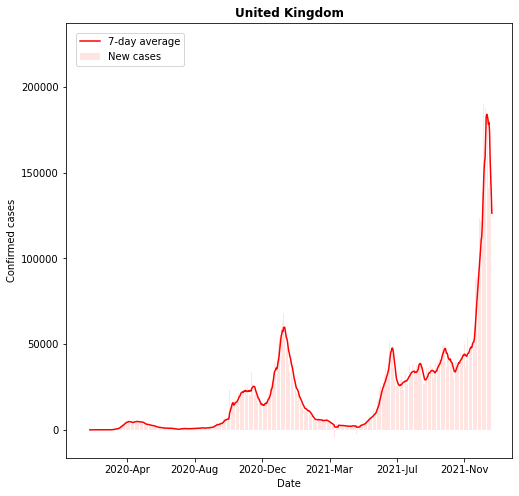

In [14]:
#日本の感染傾向を視覚化する．
import matplotlib.ticker as ticker

#列番号の取得
id_x = df2_c.columns.get_loc('United Kingdom')

#グラフ化
fig, ax  = plt.subplots(figsize=(8, 8))

ax.bar(x = df2_c.index, height = df2_c[str(df2_c.columns[id_x])], color = 'mistyrose', label = "New cases")
ax.plot(df2_c.index, df2_c[str(df2_c.columns[id_x + len(country_m)])], color = 'red',label = "7-day average")
ax.set_xlabel("Date")
ax.set_ylabel("Confirmed cases")
plt.rcParams["font.size"] = 10
ax.xaxis.set_major_locator(ticker.MultipleLocator(120.00)) #120日間隔
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%b')) #'%b
plt.title(str(df2_c.columns[id_x]),fontweight="bold")
plt.legend(bbox_to_anchor=(0, 1), loc='upper left', borderaxespad=1, fontsize=10)
plt.show()

In [15]:
#世界各国の感染傾向のグラフ化

fig, ax  = plt.subplots(dpi=100, figsize=(60, 120))
plt.subplots_adjust(wspace=0.4, hspace=0.6)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.tick_params(labelbottom=False)
plt.tick_params(bottom=False)

for i in range(len(country_m)):
    ax = fig.add_subplot(20, 10, i+1)

    country_name = list(country_m)[i]

    ax.bar(x = df2_c.index, height = df2_c[country_name], color = 'mistyrose', label = "New cases")
    ax.plot(df2_c.index, df2_c[country_name +'_7-dayAverage'], color = 'red',label = "7-day average")

    ax.set_xlabel("Date")
    ax.set_ylabel("Confirmed cases")
    plt.rcParams["font.size"] = 10
    ax.xaxis.set_major_locator(ticker.MultipleLocator(180.00)) #120日間隔
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%y-%b'))
    plt.title(country_name,fontweight="bold")
    plt.legend(bbox_to_anchor=(0, 1), loc='upper left', borderaxespad=1, fontsize = 7)
 
# general title
plt.suptitle("Where Countries Are on the Curve", fontsize=13, fontweight=0, color='black', style='italic', y=1.02)

dt_today = datetime.date.today()
plt.savefig(str(dt_today) + "_COVID-19_timeseries.png") #表示のみの場合は無効もしくは削除してください．
plt.savefig(str(dt_today) + "_COVID-19_timeseries.jpg") #表示のみの場合は無効もしくは削除してください．

Output hidden; open in https://colab.research.google.com to view.

In [16]:
df2_d = df2_d.diff(1)
df2_d.head()

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,Azerbaijan,Bahamas,Bahrain,Bangladesh,Barbados,Belarus,Belgium,Belize,Benin,Bhutan,Bolivia,Bosnia and Herzegovina,Botswana,Brazil,Brunei,Bulgaria,Burkina Faso,Burma,Burundi,Cabo Verde,Cambodia,Cameroon,Canada,Central African Republic,Chad,Chile,China,Colombia,Comoros,Congo (Brazzaville),...,Sierra Leone,Singapore,Slovakia,Slovenia,Solomon Islands,Somalia,South Africa,South Sudan,Spain,Sri Lanka,Sudan,Summer Olympics 2020,Suriname,Sweden,Switzerland,Syria,Taiwan*,Tajikistan,Tanzania,Thailand,Timor-Leste,Togo,Tonga,Trinidad and Tobago,Tunisia,Turkey,US,Uganda,Ukraine,United Arab Emirates,United Kingdom,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Yemen,Zambia,Zimbabwe
2020-01-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-26,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
#過去七日間の死亡者数の平均値を算出する．

for i in range(len(df2_d.columns)):
  df2_d[df2_d.columns[i]+'_7-dayAverage'] =df2_d[df2_d.columns[i]].rolling(7).mean().round(1)

df2_d.head()

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,Azerbaijan,Bahamas,Bahrain,Bangladesh,Barbados,Belarus,Belgium,Belize,Benin,Bhutan,Bolivia,Bosnia and Herzegovina,Botswana,Brazil,Brunei,Bulgaria,Burkina Faso,Burma,Burundi,Cabo Verde,Cambodia,Cameroon,Canada,Central African Republic,Chad,Chile,China,Colombia,Comoros,Congo (Brazzaville),...,Sierra Leone_7-dayAverage,Singapore_7-dayAverage,Slovakia_7-dayAverage,Slovenia_7-dayAverage,Solomon Islands_7-dayAverage,Somalia_7-dayAverage,South Africa_7-dayAverage,South Sudan_7-dayAverage,Spain_7-dayAverage,Sri Lanka_7-dayAverage,Sudan_7-dayAverage,Summer Olympics 2020_7-dayAverage,Suriname_7-dayAverage,Sweden_7-dayAverage,Switzerland_7-dayAverage,Syria_7-dayAverage,Taiwan*_7-dayAverage,Tajikistan_7-dayAverage,Tanzania_7-dayAverage,Thailand_7-dayAverage,Timor-Leste_7-dayAverage,Togo_7-dayAverage,Tonga_7-dayAverage,Trinidad and Tobago_7-dayAverage,Tunisia_7-dayAverage,Turkey_7-dayAverage,US_7-dayAverage,Uganda_7-dayAverage,Ukraine_7-dayAverage,United Arab Emirates_7-dayAverage,United Kingdom_7-dayAverage,Uruguay_7-dayAverage,Uzbekistan_7-dayAverage,Vanuatu_7-dayAverage,Venezuela_7-dayAverage,Vietnam_7-dayAverage,West Bank and Gaza_7-dayAverage,Yemen_7-dayAverage,Zambia_7-dayAverage,Zimbabwe_7-dayAverage
2020-01-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-26,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


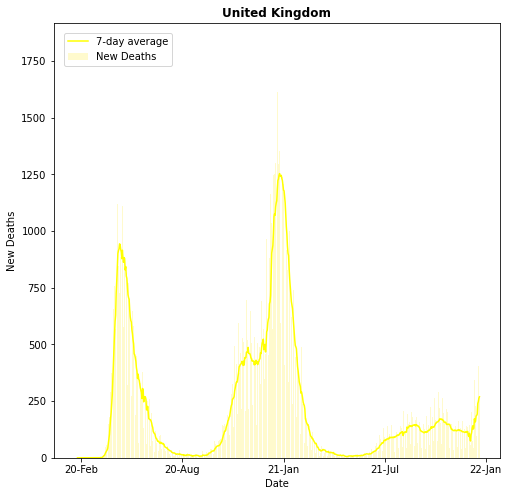

In [18]:
#日本の感染傾向を視覚化する．
import matplotlib.ticker as ticker

#列番号の取得
id_x = df2_d.columns.get_loc('United Kingdom')

#グラフ化
fig, ax  = plt.subplots(figsize=(8, 8))

ax.bar(x = df2_d.index, height = df2_d[str(df2_d.columns[id_x])], color = 'lemonchiffon', label = "New Deaths")
ax.plot(df2_d.index, df2_d[str(df2_d.columns[id_x + len(country_m)])], color = 'yellow',label = "7-day average")
ax.set_xlabel("Date")
ax.set_ylabel("New Deaths")
plt.rcParams["font.size"] = 10
ax.xaxis.set_major_locator(ticker.MultipleLocator(180.00)) #120日間隔
ax.xaxis.set_major_formatter(mdates.DateFormatter('%y-%b'))
plt.title(str(df2_c.columns[id_x]),fontweight="bold")
plt.legend(bbox_to_anchor=(0, 1), loc='upper left', borderaxespad=1, fontsize=10)
plt.show()

In [19]:
#世界各国の感染傾向のグラフ化

fig, ax  = plt.subplots(dpi=100, figsize=(60, 120))
plt.subplots_adjust(wspace=0.4, hspace=0.6)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.tick_params(labelbottom=False)
plt.tick_params(bottom=False)

for i in range(len(country_m)):
  ax = fig.add_subplot(20, 10, i+1)

  country_name = list(country_m)[i]

  ax.bar(x = df2_d.index, height = df2_d[country_name], color = 'lemonchiffon', label = "New cases")
  ax.plot(df2_d.index, df2_d[country_name +'_7-dayAverage'], color = 'yellow',label = "7-day average")

  ax.set_xlabel("Date")
  ax.set_ylabel("New Deaths")
  plt.rcParams["font.size"] = 10
  ax.xaxis.set_major_locator(ticker.MultipleLocator(180.00)) #120日間隔
  ax.xaxis.set_major_formatter(mdates.DateFormatter('%y-%b'))
  plt.title(country_name,fontweight="bold")
  plt.legend(bbox_to_anchor=(0, 1), loc='upper left', borderaxespad=1, fontsize = 7)
 
# general title
plt.suptitle("Where Countries Are on the Curve", fontsize=13, fontweight=0, color='black', style='italic', y=1.02)

dt_today = datetime.date.today()
plt.savefig(str(dt_today) + "_COVID-19_timeseries.png") #表示のみの場合は無効もしくは削除してください．
plt.savefig(str(dt_today) + "_COVID-19_timeseries.jpg") #表示のみの場合は無効もしくは削除してください．

Output hidden; open in https://colab.research.google.com to view.

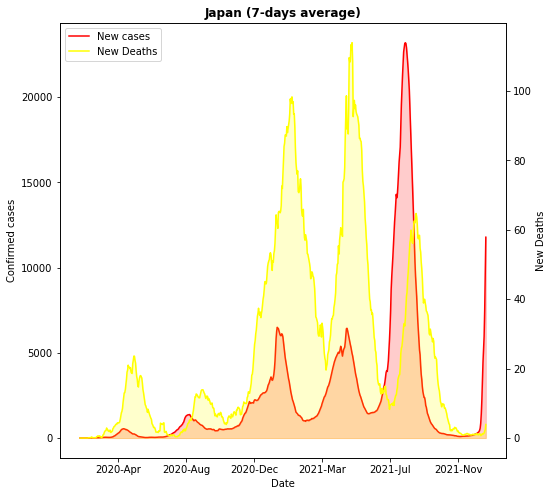

In [20]:
#日本の感染傾向を視覚化する．
import matplotlib.ticker as ticker

#列番号の取得
id_x = df2_c.columns.get_loc('Japan')

#グラフ化
fig, ax1  = plt.subplots(figsize=(8, 8))


ax1.plot(df2_c.index, df2_c[str(df2_d.columns[id_x]) +'_7-dayAverage'],  color = 'red',label = "New cases")
ax1.fill_between(df2_c.index, df2_c[str(df2_d.columns[id_x])+'_7-dayAverage'], color = 'red',alpha=0.2)

ax2 = ax1.twinx()
ax2.plot(df2_d.index, df2_d[str(df2_d.columns[id_x]) +'_7-dayAverage'], color = 'yellow',label = "New Deaths")
ax2.fill_between(df2_d.index, df2_d[str(df2_d.columns[id_x])+'_7-dayAverage'], color = 'yellow',alpha=0.2)

h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
ax1.legend(h1+h2, l1+l2, loc='upper left')

ax1.set_xlabel("Date")
ax1.set_ylabel("Confirmed cases")
ax2.set_ylabel("New Deaths")

plt.rcParams["font.size"] = 10
ax1.xaxis.set_major_locator(ticker.MultipleLocator(120.00)) #120日間隔
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%b')) #'%b

plt.title(str(df2_c.columns[id_x]) +' (7-days average)',fontweight="bold")
plt.show()

In [21]:
#世界各国の感染傾向のグラフ化

fig, ax  = plt.subplots(dpi=100, figsize=(60, 120))
plt.subplots_adjust(wspace=0.4, hspace=0.6)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.tick_params(labelbottom=False)
plt.tick_params(bottom=False)

for i in range(len(country_m)):
  ax1 = fig.add_subplot(20, 10, i+1)

  country_name = list(country_m)[i]

  ax1.plot(df2_c.index, df2_c[country_name +'_7-dayAverage'], color = 'red',label = "New cases")
  ax1.fill_between(df2_c.index, df2_c[country_name +'_7-dayAverage'], color = 'red',alpha=0.2)

  ax2 = ax1.twinx()
  ax2.plot(df2_d.index, df2_d[country_name +'_7-dayAverage'], color = 'yellow',label = "New Deaths")
  ax2.fill_between(df2_d.index, df2_d[country_name +'_7-dayAverage'], color = 'yellow',alpha=0.2)

  h1, l1 = ax1.get_legend_handles_labels()
  h2, l2 = ax2.get_legend_handles_labels()
  ax1.legend(h1+h2, l1+l2, loc='upper left')

  ax1.set_xlabel("Date")
  ax1.set_ylabel("Confirmed cases")
  ax2.set_ylabel("New Deaths")

  plt.rcParams["font.size"] = 10

  ax1.xaxis.set_major_locator(ticker.MultipleLocator(120.00)) #120日間隔
  ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%b')) #'%b
  plt.title(country_name +' (7-days average)',fontweight="bold")

# general title
plt.suptitle("Where Countries Are on the Curve", fontsize=13, fontweight=0, color='black', style='italic', y=1.02)

dt_today = datetime.date.today()
plt.savefig(str(dt_today) + "_COVID-19_timeseries.png") #表示のみの場合は無効もしくは削除してください．
plt.savefig(str(dt_today) + "_COVID-19_timeseries.jpg") #表示のみの場合は無効もしくは削除してください．

Output hidden; open in https://colab.research.google.com to view.

In [22]:
#新規感染者数に対する死者数の割合を算出．

for country_name in df2.columns:
  df2[country_name+'_ new deaths to cases ratio'] =df2_d[country_name + '_7-dayAverage'] / df2_c[country_name + '_7-dayAverage']

df2.head()

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,Azerbaijan,Bahamas,Bahrain,Bangladesh,Barbados,Belarus,Belgium,Belize,Benin,Bhutan,Bolivia,Bosnia and Herzegovina,Botswana,Brazil,Brunei,Bulgaria,Burkina Faso,Burma,Burundi,Cabo Verde,Cambodia,Cameroon,Canada,Central African Republic,Chad,Chile,China,Colombia,Comoros,Congo (Brazzaville),...,Sierra Leone_ new deaths to cases ratio,Singapore_ new deaths to cases ratio,Slovakia_ new deaths to cases ratio,Slovenia_ new deaths to cases ratio,Solomon Islands_ new deaths to cases ratio,Somalia_ new deaths to cases ratio,South Africa_ new deaths to cases ratio,South Sudan_ new deaths to cases ratio,Spain_ new deaths to cases ratio,Sri Lanka_ new deaths to cases ratio,Sudan_ new deaths to cases ratio,Summer Olympics 2020_ new deaths to cases ratio,Suriname_ new deaths to cases ratio,Sweden_ new deaths to cases ratio,Switzerland_ new deaths to cases ratio,Syria_ new deaths to cases ratio,Taiwan*_ new deaths to cases ratio,Tajikistan_ new deaths to cases ratio,Tanzania_ new deaths to cases ratio,Thailand_ new deaths to cases ratio,Timor-Leste_ new deaths to cases ratio,Togo_ new deaths to cases ratio,Tonga_ new deaths to cases ratio,Trinidad and Tobago_ new deaths to cases ratio,Tunisia_ new deaths to cases ratio,Turkey_ new deaths to cases ratio,US_ new deaths to cases ratio,Uganda_ new deaths to cases ratio,Ukraine_ new deaths to cases ratio,United Arab Emirates_ new deaths to cases ratio,United Kingdom_ new deaths to cases ratio,Uruguay_ new deaths to cases ratio,Uzbekistan_ new deaths to cases ratio,Vanuatu_ new deaths to cases ratio,Venezuela_ new deaths to cases ratio,Vietnam_ new deaths to cases ratio,West Bank and Gaza_ new deaths to cases ratio,Yemen_ new deaths to cases ratio,Zambia_ new deaths to cases ratio,Zimbabwe_ new deaths to cases ratio
2020-01-22,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,548,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-23,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,643,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-24,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,920,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-25,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1406,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-26,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,2075,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


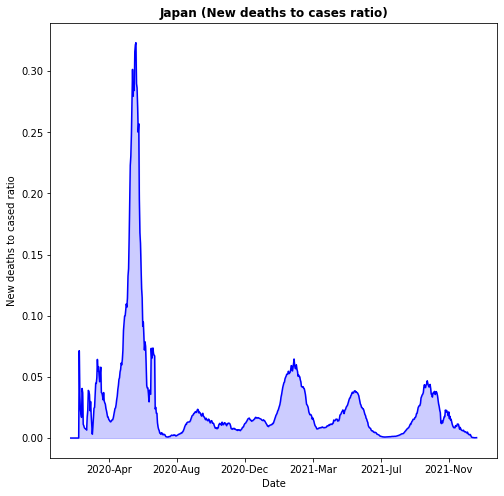

In [23]:
#日本の感染傾向を視覚化する．
import matplotlib.ticker as ticker

#列番号の取得
id_x = df2_c.columns.get_loc('Japan')

#グラフ化
fig, ax  = plt.subplots(figsize=(8, 8))


ax.plot(df2.index, df2[str(df2.columns[id_x + len(country_m)])], color = 'blue',label = "New deaths to cases ratio")
ax.fill_between(df2.index, df2[str(df2.columns[id_x + len(country_m)])], color = 'blue',alpha=0.2)

ax.set_xlabel("Date")
ax.set_ylabel("New deaths to cased ratio")
plt.rcParams["font.size"] = 10
ax.xaxis.set_major_locator(ticker.MultipleLocator(120.00)) #120日間隔
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%b')) #'%b
plt.title(str(df2.columns[id_x]) +(' (New deaths to cases ratio)'),fontweight="bold")
plt.show()

In [25]:
#世界各国の感染傾向のグラフ化

fig, ax  = plt.subplots(dpi=100, figsize=(60, 120))
plt.subplots_adjust(wspace=0.4, hspace=0.6)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.tick_params(labelbottom=False)
plt.tick_params(bottom=False)

for i in range(len(country_m)):
  ax = fig.add_subplot(20, 10, i+1)

  country_name = list(country_m)[i]

  ax.plot(df2.index, df2[country_name+'_ new deaths to cases ratio'], color = 'blue',label = "New deaths to cased ratio")
  ax.fill_between(df2.index, df2[country_name+'_ new deaths to cases ratio'], color = 'blue',alpha=0.2)

  ax.set_xlabel("Date")
  ax.set_ylabel("New Deaths")
  plt.rcParams["font.size"] = 10
  ax.xaxis.set_major_locator(ticker.MultipleLocator(180.00)) #120日間隔
  ax.xaxis.set_major_formatter(mdates.DateFormatter('%y-%b'))
  plt.title((country_name + ' (New deaths to cases ration)'),fontweight="bold")

 
# general title
plt.suptitle("Where Countries Are on the Curve", fontsize=13, fontweight=0, color='black', style='italic', y=1.02)

dt_today = datetime.date.today()
plt.savefig(str(dt_today) + "_COVID-19_new_deaths_to_cases_ratio_timeseries.png") #表示のみの場合は無効もしくは削除してください．
plt.savefig(str(dt_today) + "_COVID-19_new_deaths_to_cases_ratio_timeseries.jpg") #表示のみの場合は無効もしくは削除してください．

Output hidden; open in https://colab.research.google.com to view.